In [65]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

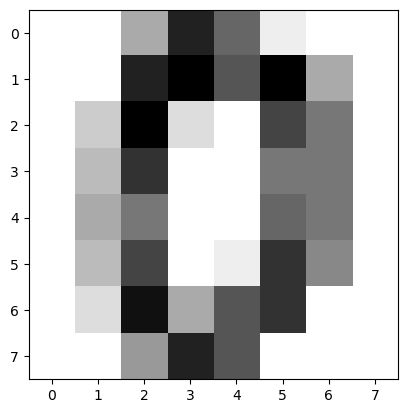

In [66]:
# 8 * 8 숫자 이미지 출력
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [67]:
# 데이터 평탄화 (2차원 -> 1차원)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [68]:
# 훈련 : 테스트 = 80 : 20 으로 분할
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [69]:
# 모델 선정
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

In [70]:
# 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [74]:
# 예측값 평가
y_pred = knn.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
score

0.9916666666666667

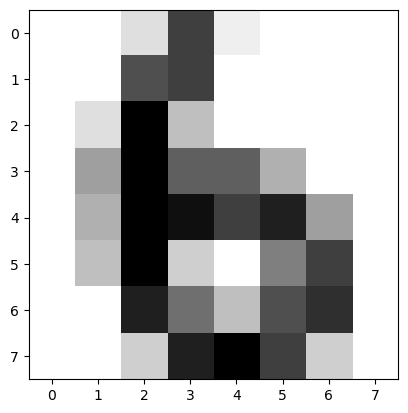

array([6])

In [72]:
# 입력값과 예측값 확인하기
idx = 33

plt.imshow(X_test[idx].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

y_pred = knn.predict([X_test[idx]])
y_pred

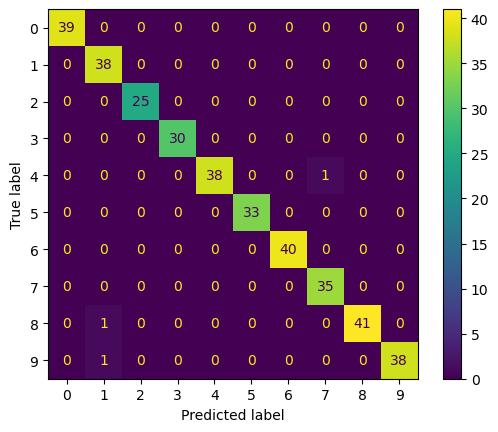

In [75]:
# 혼동 행렬 출력
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [76]:
# 분류 리포트
print(f"{metrics.classification_report(y_test, y_pred)}\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.99        39
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        40
           7       0.97      1.00      0.99        35
           8       1.00      0.98      0.99        42
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


